# Table of Contents

### Contents:
- [Imports, reading in data](#Initial-Steps)
- [Choosing features](#Choosing-features)
- [Fitting the model](#Fitting-the-model)
- [Scoring and evaluating the model](#Scoring-and-evaluating-the-model)

This is the second model, still relatively blind but does have the dummies.

# Initial Steps

In [1]:
# imports

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read in cleaned TRAIN data
train = pd.read_csv('../datasets/train_clean_dum.csv')

In [3]:
train.shape

(1556, 246)

In [4]:
# I want to play with the training data, I don't actually want to mess with it
# rerun this cell to get original data
df = train

In [5]:
# read in cleaned TEST data
test = pd.read_csv('../datasets/test_clean_dum.csv')

In [6]:
test.shape

(878, 245)

#### * note that the baseline model is the mean house price, done in april 2 notebook


# Choosing features

In [7]:
# WHICH COLUMNNS DO I CARE ABOUT
# look at CORRELATION  with price

# look at all correlations for sale price
corr_vector = df.corr()[['saleprice']].sort_values('saleprice')


# take just the correlations whose absolute values are greater than 0.2
strong_corr_vector = corr_vector[abs(corr_vector['saleprice'])>0.2]

# don't want to include sale price in the list of features for input
features = strong_corr_vector.drop('saleprice')
features = features.index

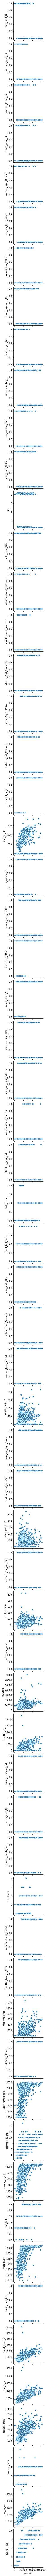

In [15]:
# let's look at the pairplots of the columns of interest against saleprice
sns.pairplot(df, y_vars=features, x_vars=['saleprice'])

# looks like a lot of the variables would do well with logistic regression instead



In [8]:
# let X be the numeric columns most strongly correlated to sale price
X = df[features]

# let y be the sale price, the goal output
y = df['saleprice']

In [11]:
y = np.log(y)

In [17]:
# save a copy of the official TEST dataset that has these same columns
test_mod_2 = test[features]
test_mod_2.to_csv('../datasets/test_mod_2.csv')

# Fitting the model

In [12]:
# split our data into train and test data to properly cross validate our model 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

In [25]:
# instantiate linear regression model and fit it to our data

lr = LinearRegression()
lr.fit(X_train, y_train)

# look at the coefficients and interpret them

coefs = pd.Series(lr.coef_, index = features)
coefs.sort_values()

exterior_1st_CemntBd   -0.124598
kitchen_qual_TA        -0.068497
ms_zoning_RM           -0.054280
kitchen_qual_Gd        -0.047667
heating_qc_TA          -0.038148
                          ...   
mas_vnr_type_None       0.104314
mas_vnr_type_Stone      0.105413
garage_type_Attchd      0.123445
central_air_Y           0.142151
exterior_2nd_CmentBd    0.163292
Length: 62, dtype: float64

# Scoring and evaluating the model

In [14]:
# scoring

print(f'The training score is: {lr.score(X_train, y_train)}')
print(f'The testing score is: {lr.score(X_test, y_test)}')
print(f'The cross validation score is: {cross_val_score(lr, X_train, y_train, cv=5).mean()}')

# I think this is pretty good
# better than model 1

The training score is: 0.8803196044938223
The testing score is: 0.8271058921941721
The cross validation score is: 0.8223361228936039


In [15]:
# generate the predicted values
y_preds = lr.predict(X)

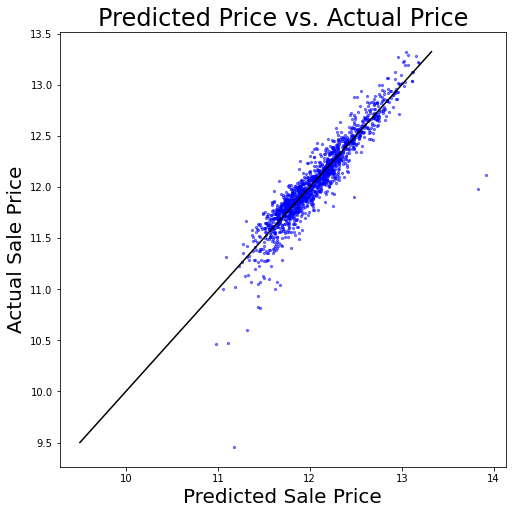

In [19]:
# Plot the model
plt.figure(figsize=(8,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, s=5, color='blue', alpha = 0.5)

# Plot a line.
plt.plot([9.5, np.max(y)],
         [9.5, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Sale Price", fontsize = 20)
plt.ylabel("Actual Sale Price", fontsize = 20)
plt.title('Predicted Price vs. Actual Price', fontsize = 24);

plt.savefig('../visuals/everything')
# looks like we might want to take the log

In [24]:
lr.predict(test_mod_2)

array([151781.53644827, 169103.7786473 , 222243.17500051, 106366.88903094,
       174308.66023784,  99069.99877251,  92400.03963231, 140530.59237194,
       187062.06859046, 165465.72373946, 156938.79196021, 126613.3829121 ,
       164182.73264491, 317846.92101479, 146251.9660101 , 150015.41707369,
       152434.63059224, 121676.51325259, 201827.39504906, 192093.51827831,
       154181.33445453, 133114.38498692, 182436.27417859, 202494.54803701,
       170507.59115553, 104358.53885425, 169430.31570133, 141859.76890098,
       172820.11542401,  23388.95149989,  87637.62873694,  78750.90450826,
       213171.94524634, 145596.00920843, 207092.66725284, 184046.16562118,
       114343.41467942,  88011.9516453 , 150703.20925076, 198909.22396849,
       178629.23755801, 201890.47456133, 153667.8534657 , 127557.33722177,
       221502.66747974,  84410.71340264, 216676.46382234, 128372.21541511,
       118762.70498338, 117143.13776012,  96919.21427401, 192183.45089452,
       236106.0868215 , 1

In [26]:
# let's submit this to kaggle

# this will go in the sale price column 
y_preds_test = lr.predict(test_mod_2)

submission = pd.DataFrame(y_preds_test, columns = ['SalePrice'])
submission['Id'] = test['id']

In [27]:
submission.shape

(878, 2)

In [28]:
submission.to_csv('../datasets/submissions/sub_3.csv', index = False)

In [29]:
# baseline model should be the mean of y
# look at april 2 notebook

# check the scores of the model with the mean
sub = pd.read_csv('../datasets/submissions/sub_3.csv')

In [30]:
sub.shape

(878, 2)

# Kaggle Score

this was submisssion 3 and the score was 31616.09775